# Spotify Data Analysis: Exploring the Factors that Influence the Popularity of Songs on Spotify

Jun Lee

## 1. Introduction

> Motivation:

The motivation for analyzing the Spotify dataset is to gain insights on the factors that contribute to a song's popularity and chart success. Understanding such factors can be helpful for music artists, record labels, and even other streaming services to optimize their growth strategies, improve discoverability of newly released songs, and enhance user engagement. Recent research studies have found that audio features such as energy level, danceability, and loudness can have a significant impact on a song's popularity on Spotify (Devlin et al., 2020; Ferreira et al., 2021). In addition, it is also shown that the genre of a song has proved to be a critical predictor of its chart success (Bailey et al., 2020). Therefore, by conducting descriptive, inferential, and regression analeses on Spotify dataset, I felt that I can potentially address hidden trends and patters in the data to build predictive models (and forecast a song's popularity based on audio features, genre, and other relavent factors), and I plan to dive deeper into such areas within this research. 

> How Could This Be Used?
- Understanding such factors can be helpful for music artists, record labels, and even other streaming services to optimize their growth strategies, improve discoverability of newly released songs, and enhance user engagement

Reference: <br>
Devlin, S., Kusner, M. J., Sun, J., & Weinberger, K. Q. (2020). How Popular Is It? Classification Explanations with Product-Based Representations of Songs. In Proceedings of the 2020 Conference on Fairness, Accountability, and Transparency (pp. 71-80). <br>
Ferreira, L., Carvalho, M., & Amado, M. (2021). Exploring the Factors Affecting the Popularity of Music on Spotify. In Trends and Applications in Information Systems and Technologies (pp. 1045-1054). Springer. <br>
Bailey, R., Metcalfe, D., & Coulton, P. (2020). What Makes a Hit? An Analysis of the Traits Associated with the Chart Success of Popular Songs. In Proceedings of the 2020 CHI Conference on Human Factors in Computing Systems (pp. 1-12).

> Research Questions:

1. Descriptive Analytics Research Question:
- How do the audio features of songs (e.g. danceability, energy, loudness) differ between the top 200 and viral 50 lists on Spotify? Are there any correlations between these audio features?
- This analysis will provide insight on the audio features that tend to make a song popular on Spotify, and the findings could be used for music producers or record labels to make informed decisions about which songs to promote, produce, or invest in

2. Inference Research Question:
- Do songs that belong to dance pop genre (categorical) tend to have higher popularity (numerical variable) compared to songs from latin genre?

3. Linear Regression Research Question:
- Is there a linear relationship between the audio features (danceability, energy, loudness, etc) and the number of streams a song gets on Spotify? If so, can we predict a song's popularity (numerical response variable) based on its danceability, energy, loudness, and valence (explanatory variables)?
- Could be beneficial for record labels, streaming platforms, or other music industry organizations that are looking to identify potential hits and promote them to a wider audience

4. Logistic Regression Research Question:
- Is there a linear relationship between the log odds of the popularity of a song and the highest charting position, the number of times song was charted, liveness, streams and loudness of the song in the sample? 

> Imports

In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.stats import norm
from scipy.stats import t
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix

#### Dataset:

Spotify dataset

In [335]:
df = pd.read_csv("spotify_top_200_sample.csv")
print(df.dtypes)
print(df.shape)
df.head(10)

Highest_Charting_Position           int64
Number_of_Times_Charted             int64
Week_of_Highest_Charting           object
Week_of_Highest_Charting_year       int64
Week_of_Highest_Charting_month      int64
Week_of_Highest_Charting_day        int64
Song_Name                          object
Streams                             int64
Artist                             object
Artist_Followers                    int64
Song_ID                            object
Release_Date                       object
Release_Date_year                 float64
Release_Date_month                 object
Release_Date_day                  float64
Weeks_Charted                      object
Weeks_Charted_year                  int64
Weeks_Charted_month                 int64
Weeks_Charted_day                   int64
Popularity                          int64
Danceability                      float64
Energy                            float64
Loudness                          float64
Speechiness                       

,Highest_Charting_Position,Number_of_Times_Charted,Week_of_Highest_Charting,Week_of_Highest_Charting_year,Week_of_Highest_Charting_month,Week_of_Highest_Charting_day,Song_Name,Streams,Artist,Artist_Followers,...,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_ms,Valence,Chord,Genre_1
0,8,24,4/2/21,2021,4,2,Heartbreak Anniversary,8832945,Giveon,1398563,...,0.465,-8.964,0.079,0.524,0.303,89.087,198371,0.543,C,pop
1,92,2,5/15/20,2020,5,15,X (with KAROL G),5018592,Jonas Brothers,5436999,...,0.827,-5.090,0.062,0.049,0.321,117.977,185277,0.750,E,boy band
2,181,1,12/18/20,2020,12,18,Christmas Tree Farm,6657404,Taylor Swift,42227614,...,0.680,-4.505,0.033,0.060,0.324,134.002,228027,0.437,G,pop
3,12,29,11/27/20,2020,11,27,TE MUDASTE,5242347,Bad Bunny,36142273,...,0.637,-4.835,0.059,0.234,0.118,92.025,130014,0.471,A#/Bb,latin
4,32,10,1/3/20,2020,1,3,Futsal Shuffle 2020,5386512,Lil Uzi Vert,11821805,...,0.457,-8.191,0.156,0.033,0.231,136.970,198913,0.296,G,melodic rap
5,109,1,2/21/20,2020,2,21,Interlude : Shadow,6655856,BTS,37151476,...,0.798,-6.439,0.483,0.115,0.181,149.756,259821,0.141,A,k-pop
6,135,15,8/28/20,2020,8,28,El Mismo Aire - con Pablo Alborán,4705484,Camilo,10580764,...,0.492,-6.591,0.295,0.603,0.323,144.511,188213,0.660,C,colombian pop
7,47,1,6/25/21,2021,6,25,LEMONHEAD (feat. 42 Dugg),11380679,"Tyler, The Creator",6777818,...,0.586,-6.612,0.212,0.155,0.535,137.131,130980,0.487,C#/Db,hip hop
8,76,17,6/26/20,2020,6,26,Tak Tiki Tak,4761286,Harry Nach,134339,...,0.579,-4.780,0.081,0.333,0.172,99.994,212406,0.231,B,trap chileno
9,129,1,1/24/20,2020,1,24,Donuts,6113037,Gzuz,1140383,...,0.703,-7.491,0.236,0.097,0.075,141.035,162938,0.556,B,deep german hip hop


In [336]:
print(df.columns)

Index(['Highest_Charting_Position', 'Number_of_Times_Charted',
       'Week_of_Highest_Charting', 'Week_of_Highest_Charting_year',
       'Week_of_Highest_Charting_month', 'Week_of_Highest_Charting_day',
       'Song_Name', 'Streams', 'Artist', 'Artist_Followers', 'Song_ID',
       'Release_Date', 'Release_Date_year', 'Release_Date_month',
       'Release_Date_day', 'Weeks_Charted', 'Weeks_Charted_year',
       'Weeks_Charted_month', 'Weeks_Charted_day', 'Popularity',
       'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
       'Liveness', 'Tempo', 'Duration_ms', 'Valence', 'Chord', 'Genre_1'],
      dtype='object')


> Thinking Critically About The Data: Potential Limitations

- The data only includes information on songs that are available on Spotify, so it may not be representative of all music
- The data includes information on song features (such as danceability, energy, and loudness) and streaming metrics (such as the number of streams and popularity), but the data doesn't include information on the characteristics of listeners, such as demographics or location. It also does not include information on other factors that may influence a song's popularity, such as marketing or promotion

> Data Cleaning

As the dataset is small, Microsoft Excel was used disregard unnecessary variables for analysis, and dropped null values utilizing Python. The Following steps were taken to clean the dataset.
- Removing values with more than 80% Null values
- Removing Data Columns that are Irrelevant to the analysis
- Dropping null values

column: Highest_Charting_Position	 Percent of NaN value: 0.00%
column: Number_of_Times_Charted	 Percent of NaN value: 0.00%
column: Week_of_Highest_Charting	 Percent of NaN value: 0.00%
column: Week_of_Highest_Charting_year	 Percent of NaN value: 0.00%
column: Week_of_Highest_Charting_month	 Percent of NaN value: 0.00%
column: Week_of_Highest_Charting_day	 Percent of NaN value: 0.00%
column:  Song_Name	 Percent of NaN value: 0.00%
column:    Streams	 Percent of NaN value: 0.00%
column:     Artist	 Percent of NaN value: 0.00%
column: Artist_Followers	 Percent of NaN value: 0.00%
column:    Song_ID	 Percent of NaN value: 0.00%
column: Release_Date	 Percent of NaN value: 0.00%
column: Release_Date_year	 Percent of NaN value: 1.61%
column: Release_Date_month	 Percent of NaN value: 0.00%
column: Release_Date_day	 Percent of NaN value: 1.61%
column: Weeks_Charted	 Percent of NaN value: 0.00%
column: Weeks_Charted_year	 Percent of NaN value: 0.00%
column: Weeks_Charted_month	 Percent of NaN v

<AxesSubplot: >

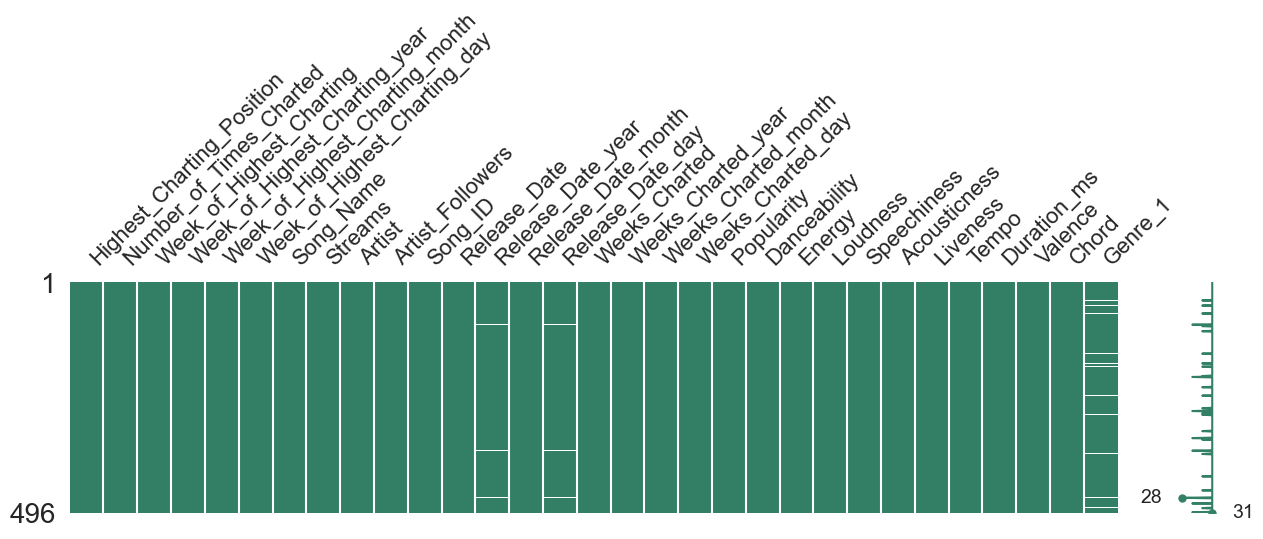

In [337]:
for col in df.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df[col].isnull().sum() / df[col].shape[0]))
    print(msg)
msno.matrix(df=df.iloc[:, :], figsize=(15,3), color=(0.2, 0.5, 0.4))

In [338]:
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(496, 31)
(468, 31)


<AxesSubplot: >

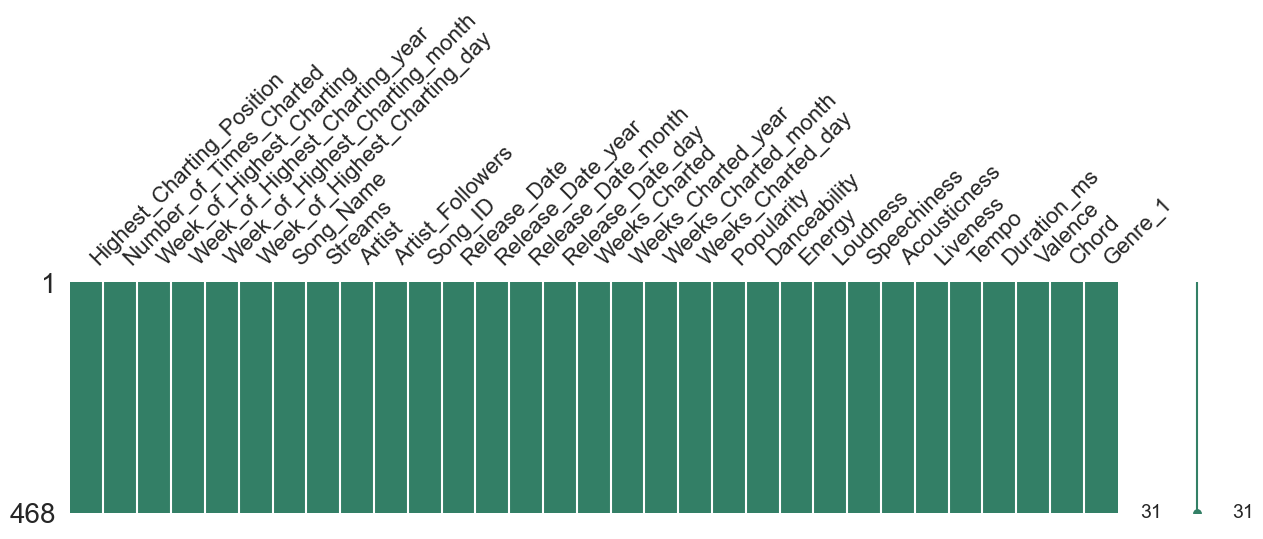

In [339]:
msno.matrix(df=df.iloc[:, :], figsize=(15,3), color=(0.2, 0.5, 0.4))

In [340]:
quant = ["Highest_Charting_Position", "Number_of_Times_Charted", "Artist_Followers", "Streams","Popularity", "Danceability", "Energy", "Loudness", "Speechiness", "Acousticness", "Liveness", "Tempo", "Duration_ms", "Valence"]
quant_vars = df[["Highest_Charting_Position", "Number_of_Times_Charted", "Artist_Followers", "Streams","Popularity", "Danceability", "Energy", "Loudness", "Speechiness", "Acousticness", "Liveness", "Tempo", "Duration_ms", "Valence"]]

## 2. Descriptive Analytics

Q: Is there an association between audio features of songs (e.g. danceability & energy) and popularity score? 

> Describe what you see in your visualization and summary statistics, what they tell you, and how they help answer your research question.

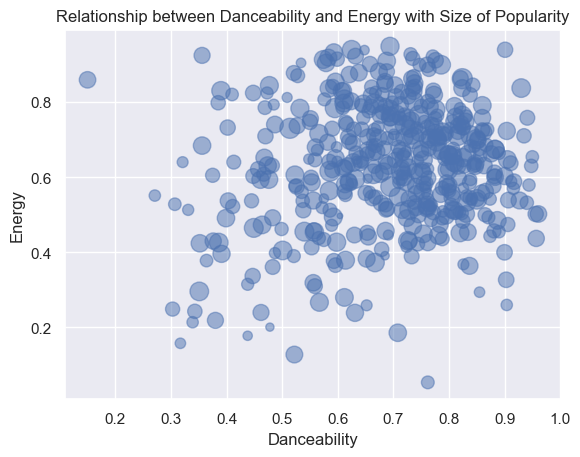

In [341]:
# Create a scatter plot to visualize the relationship between danceability and energy
plt.scatter(df['Danceability'], df['Energy'], s=df['Popularity']**2.2 / 100, alpha=0.5)
plt.title('Relationship between Danceability and Energy with Size of Popularity')
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.show()

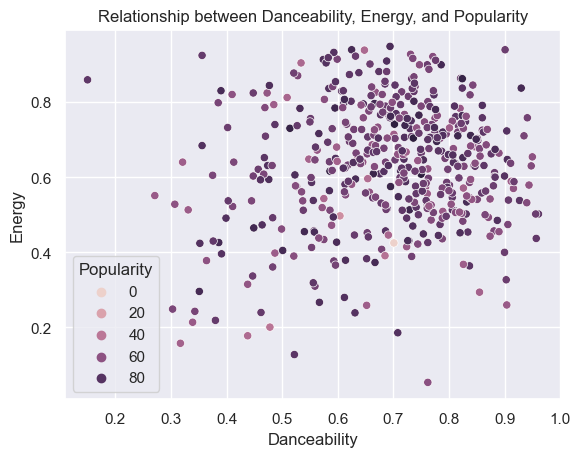

In [342]:
sns.scatterplot(data=df, x="Danceability", y="Energy",hue="Popularity")
plt.title("Relationship between Danceability, Energy, and Popularity")
plt.show()

In [343]:
# Print summary statistics of the audio features for both lists
print(df[quant].describe())

       Highest_Charting_Position  Number_of_Times_Charted  Artist_Followers  \
count                 468.000000               468.000000      4.680000e+02   
mean                   88.326923                10.425214      1.602672e+07   
std                    59.192225                17.031045      1.746920e+07   
min                     1.000000                 1.000000      4.883000e+03   
25%                    35.750000                 1.000000      3.080661e+06   
50%                    80.500000                 3.000000      7.816213e+06   
75%                   138.250000                11.000000      2.745953e+07   
max                   199.000000               142.000000      8.333778e+07   

            Streams  Popularity  Danceability      Energy    Loudness  \
count  4.680000e+02  468.000000    468.000000  468.000000  468.000000   
mean   6.346004e+06   71.602564      0.690797    0.629821   -6.389635   
std    2.907233e+06   10.816364      0.144169    0.161915    2.459598

> Key Takeaways from Descriptive Analysis: <br>
- Based on the scatter plot and summary statistics, it appears that songs that are more danceable and energetic tend to be more popular on the Spotify charts. The scatter plot shows that the majority of songs that are popular have relatively high values for both danceability and energy. Consequently, the points on the scatter plot are more concentrated in the upper right quadrant, proving that there are more songs with high danceability and energy among the most popular songs on Spotify
- The summary statistics further support this finding as the mean danceability and energy values for the songs in the data are both above 0.5, which suggests that the songs give off positive vibe and energy. Taken together, the visualizations of data suggest that there is an existing preference for upbeat and danceable music among Spotify listeners, and this insight can be beneficial for musicians or record labels aiming to create popular music

## 3. Inference

> Variable Selection: 
- Independent variable: Genre (categorical variable)
- Dependent variable: Popularity (numerical variable)

Q: Do songs that belong to dance pop genre (categorical) tend to have higher popularity (numerical variable) compared to songs from latin genre?

The inference parameter I chose is the difference between two population means.  

Let u1 represent the mean popularity of dance pop genre, and u2 represent the mean popularity of latin genre. 
- Null hypothesis (H0): μ1 = μ2 (There is no difference in mean popularity between songs in dance pop genre and latin genre)
- Alternative hypothesis (Ha): μ1 ≠ μ2 (There is a difference in mean popularity between songs in dance pop genre and latin genre)

In [344]:
# exploring the different types of genres
df["Genre_1"].value_counts().head(10)

dance pop         77
latin             45
pop               34
k-pop             18
atl hip hop       18
brooklyn drill    15
hip hop           14
melodic rap       12
canadian pop      10
german hip hop    10
Name: Genre_1, dtype: int64

In [345]:
dance_pop = df[df["Genre_1"] == "dance pop"]
latin = df[df["Genre_1"] == "latin"]
x1 = dance_pop["Popularity"].mean()
x2 = latin["Popularity"].mean()
s1 = dance_pop["Popularity"].std()
s2 = latin["Popularity"].std()
n1 = len(dance_pop) 
n2 = len(latin)
print(n1, n2)
print(x1, x2)
print(s1, s2)

77 45
72.31168831168831 72.91111111111111
11.256880633007649 7.360281066218694


Central Limit Theorem Conditions:
1. Independence: we assume that the mean popularity of genres are independent from each other
2. Randomly sampled: we assumed that different samples for genres are randomly sampled
3. Sample Size: n1 > 77 and n2 > 45. Therefore, the assumption passes

In [346]:
t_test = (x1 - x2) / np.sqrt(s1**2/n1 + s2**2/n2)
dof = min(n1 - 1, n2 - 1)

print("test ststistic = ", t_test)

test ststistic =  -0.3550960275430341


In [347]:
p = (1 - t.cdf(abs(t_test), df=dof)) * 2
print("calculated p-value = ", p)

calculated p-value =  0.7242142106106226


With a p-value of 0.7242142106106226, which is greater than the commonly used significance level of 0.05, we fail to reject the null hypothesis. Therefore, we have sufficient evidence to conclude that there is no statistically significant difference in the mean popularity score between Dance Pop Genre and Latin Genre.

However, it's important to note that this conclusion is limited to the data and time period analyzed and may not necessarily hold true for other populations or time periods.

## 4. Linear Regression

Response Variable:
- Total number of Streams
- Popularity Score

Explanatory Variables:
- Highest_Charting_Position
- Number_of_Times_Charted 
- Liveness 
- Energy 
- Streams

Research Question:
- Is there a linear relationship between the audio features (danceability, energy, loudness, etc) and the number of streams a song gets on Spotify? If so, can we predict a song's popularity (numerical response variable) based on its danceability, energy, loudness, and valence (explanatory variables)?

Because popularity score will be our response variable, let's first examine the distribution of popularity in this dataset.

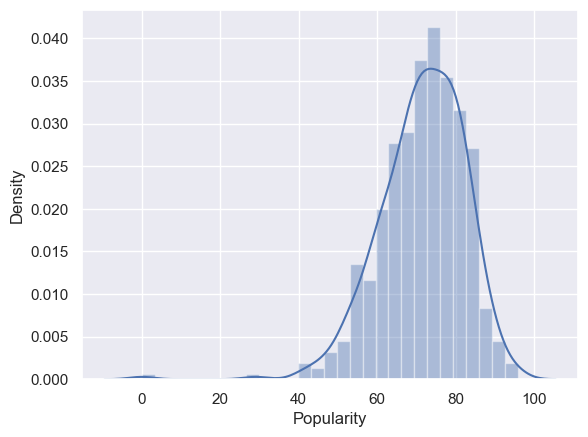

In [392]:
sns.distplot(df['Popularity'])
plt.show()

Slightly skewed. Although that might be explained by the X variables

In [349]:
model1 = smf.ols('Popularity ~ Highest_Charting_Position + Number_of_Times_Charted + Liveness + Energy + Streams + Loudness', data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Popularity   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     24.01
Date:                Wed, 03 May 2023   Prob (F-statistic):           9.45e-25
Time:                        23:36:47   Log-Likelihood:                -1714.3
No. Observations:                 468   AIC:                             3443.
Df Residuals:                     461   BIC:                             3472.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    75.6718      4.362     17.346      0.000      67.099      84.244
Highest_Charting_Position    -0.0253      0.009     -2.824      0.005      -0.043      -0.008
Number_of_Times_Charted       0.2015      0.030      6.760      0.000       0.143       0.260
Liveness                     -7.9726      3.215     -2.480      0.014     -14.291      -1.654
Energy                        1.7951      4.099      0.438      0.662      -6.259       9.849
Streams                    3.674e-07   1.64e-07      2.236      0.026    4.45e-08     6.9e-07
Loudness                      0.9361      0.268      3.491      0.001       0.409       1.463
==============================================================================
Omnibus:                      244.141   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3592.972
Skew:                          -1.890   Prob(JB):                         0.00
Kurtosis:                      16.037   Cond. No.                     9.20e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.2e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The linear regression equation is:

y = β0 + β1x1 + β2x2 + β3x3 + β4x4 

Popularity = 75.6718 -0.0253*Highest_Charting_Position + 0.2015*Number_of_Times_Charted - 7.9726*Liveness + 1.7951*Energy + 3.674e-07*Streams + 0.9361*Loudness

The percent variability discussed in this model is 0.238 which is relatively low for this model.



> Correlations

In [350]:
df[quant].corr()

,Highest_Charting_Position,Number_of_Times_Charted,Artist_Followers,Streams,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_ms,Valence
Highest_Charting_Position,1.000000,-0.443181,-0.251727,-0.323380,-0.304130,0.022049,0.047682,0.038156,0.062451,-0.025458,0.024175,0.033827,-0.069268,0.006787
Number_of_Times_Charted,-0.443181,1.000000,0.071568,-0.038634,0.382226,-0.014098,-0.094035,-0.001531,-0.017026,0.102790,-0.100727,-0.058776,0.040118,-0.037384
Artist_Followers,-0.251727,0.071568,1.000000,0.073114,0.047978,-0.092619,-0.067052,-0.026132,-0.141592,0.080711,0.003556,-0.000080,0.171982,-0.054341
Streams,-0.323380,-0.038634,0.073114,1.000000,0.118395,-0.060670,0.031812,-0.030341,-0.068797,0.015925,0.071647,0.052170,0.018951,0.118461
Popularity,-0.304130,0.382226,0.047978,0.118395,1.000000,0.042347,0.142196,0.220408,-0.144452,-0.127415,-0.120318,-0.059698,0.102713,0.018105
Danceability,0.022049,-0.014098,-0.092619,-0.060670,0.042347,1.000000,0.115881,0.143283,0.243285,-0.360067,-0.126836,-0.027739,-0.129890,0.356988
Energy,0.047682,-0.094035,-0.067052,0.031812,0.142196,0.115881,1.000000,0.739821,0.092254,-0.570661,0.087015,0.078080,0.057002,0.305759
Loudness,0.038156,-0.001531,-0.026132,-0.030341,0.220408,0.143283,0.739821,1.000000,-0.042730,-0.495082,0.035085,0.070047,0.094472,0.243818
Speechiness,0.062451,-0.017026,-0.141592,-0.068797,-0.144452,0.243285,0.092254,-0.042730,1.000000,-0.161385,0.101015,0.135248,-0.074216,0.068492
Acousticness,-0.025458,0.102790,0.080711,0.015925,-0.127415,-0.360067,-0.570661,-0.495082,-0.161385,1.000000,0.026520,-0.086608,0.013548,-0.120009


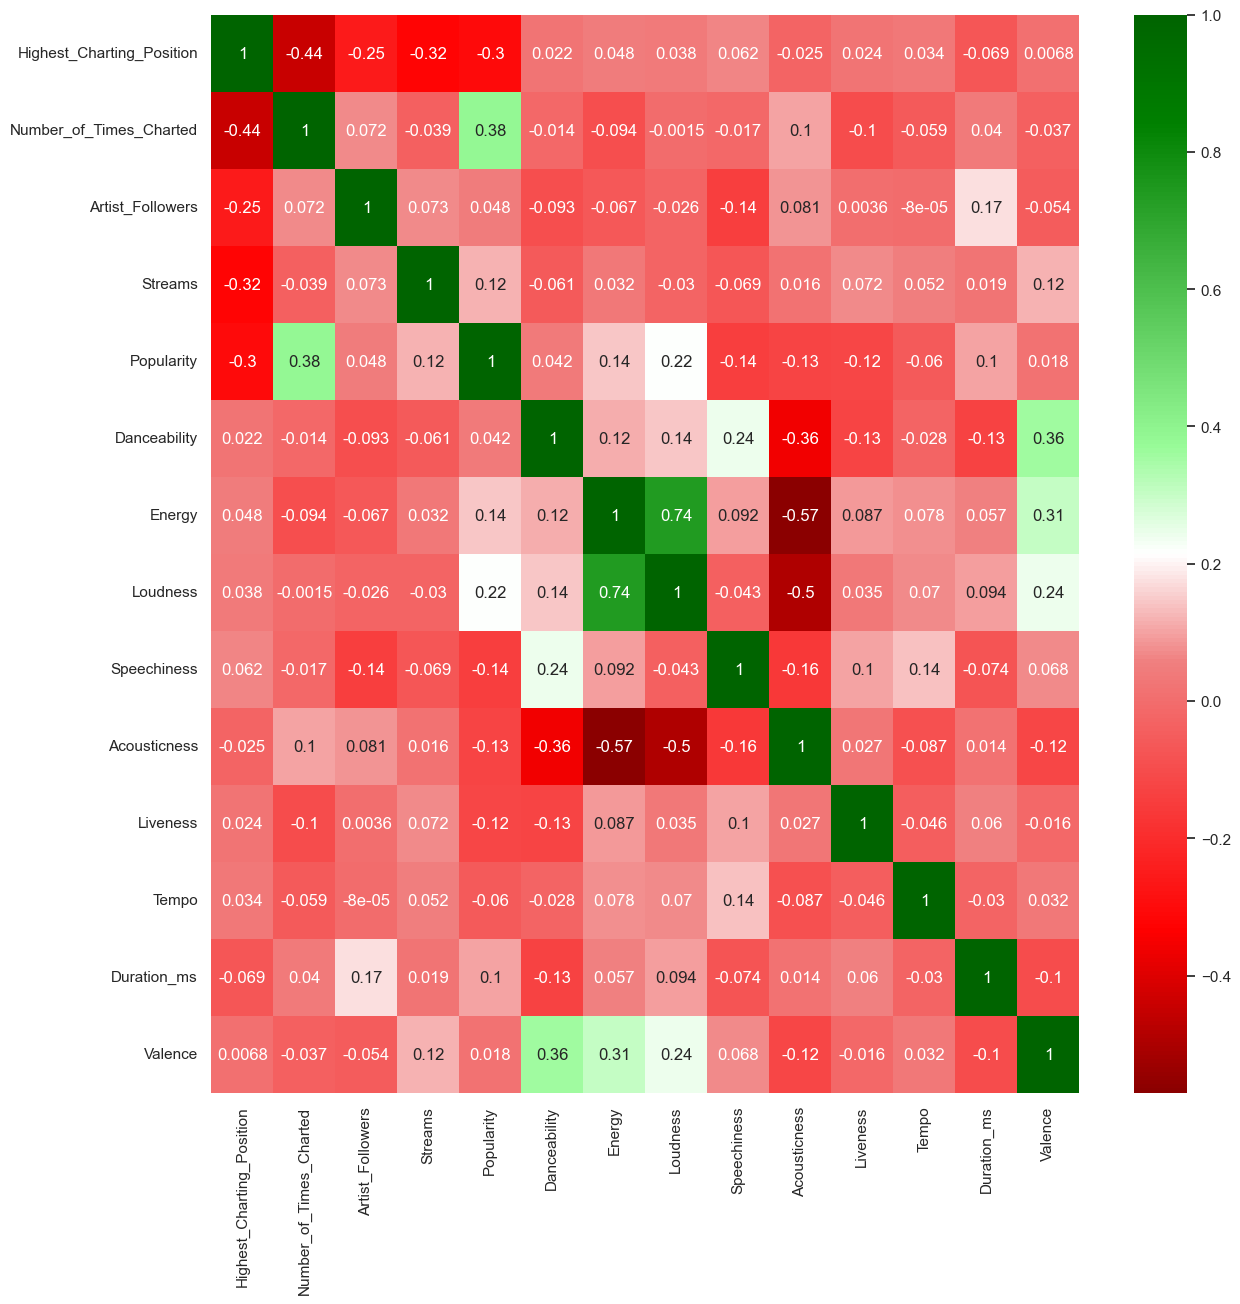

In [351]:
from  matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize = (14,14))
    
c = ["darkred","red","lightcoral","white", "palegreen","green","darkgreen"]
v = [0,.15,.4,.5,0.6,.9,1.]
l = list(zip(v,c))
colormap=LinearSegmentedColormap.from_list('rg',l, N=256)
sns.heatmap(quant_vars.astype(float).corr(), cmap=colormap, annot=True)
plt.show()

In [352]:
df[quant].corr()['Streams']

Highest_Charting_Position   -0.323380
Number_of_Times_Charted     -0.038634
Artist_Followers             0.073114
Streams                      1.000000
Popularity                   0.118395
Danceability                -0.060670
Energy                       0.031812
Loudness                    -0.030341
Speechiness                 -0.068797
Acousticness                 0.015925
Liveness                     0.071647
Tempo                        0.052170
Duration_ms                  0.018951
Valence                      0.118461
Name: Streams, dtype: float64

In [353]:
df[quant].corr()["Popularity"]

Highest_Charting_Position   -0.304130
Number_of_Times_Charted      0.382226
Artist_Followers             0.047978
Streams                      0.118395
Popularity                   1.000000
Danceability                 0.042347
Energy                       0.142196
Loudness                     0.220408
Speechiness                 -0.144452
Acousticness                -0.127415
Liveness                    -0.120318
Tempo                       -0.059698
Duration_ms                  0.102713
Valence                      0.018105
Name: Popularity, dtype: float64

> Checking Conditions

Condition 1: Linearity Condition
- Because the distribution of points in the plot below are roughly evenly distributed above and below the line
as we move from left to right, we can say the linearity condition is met

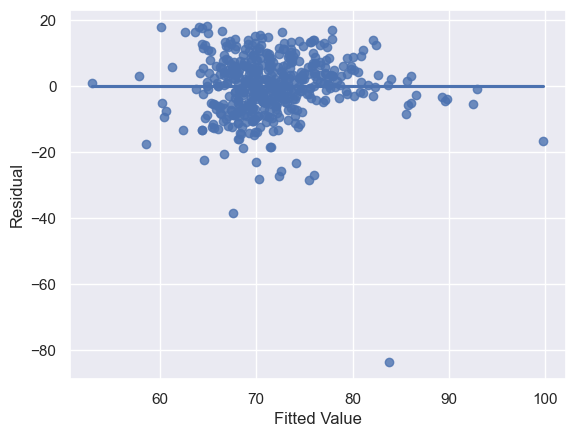

In [354]:
sns.regplot(x=model1.fittedvalues, y=model1.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()


Condition 2: Constant Variability of Residuals Condition
- Because the y‑axis spread of points in the plot below slightly change as we move from left to right, we can
say that this condition is slightly not met.

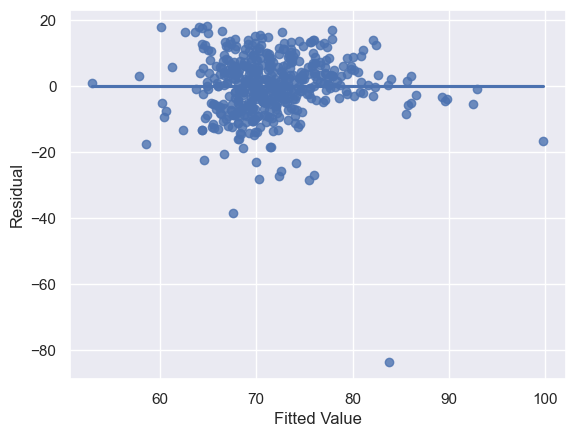

In [355]:
sns.regplot(x=model1.fittedvalues, y=model1.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

Condition 3: Normality of Residuals (with Mean of 0) Condition
- Because the histogram of residuals is significantly skewed to the left, the assumption that the residuals are
normally distributed is slightly not met. (However, it does look like the mean is about 0)

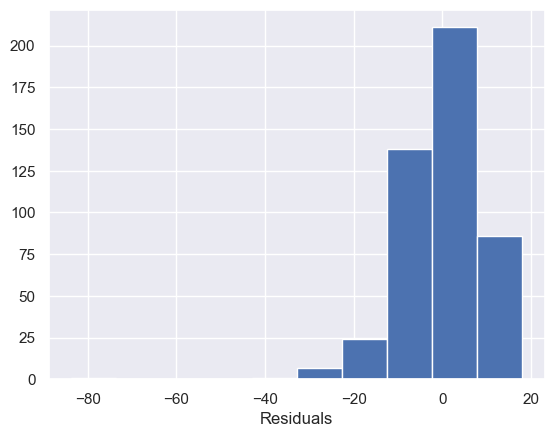

In [356]:
plt.hist(model1.resid)
plt.xlabel('Residuals')
plt.show()


Condition 4 Independence of Residuals Condition
- The data is randomly sampled
- The sample size n < 10% of all top songs on Spotify

Condition 5: No Multicollinearity Condition

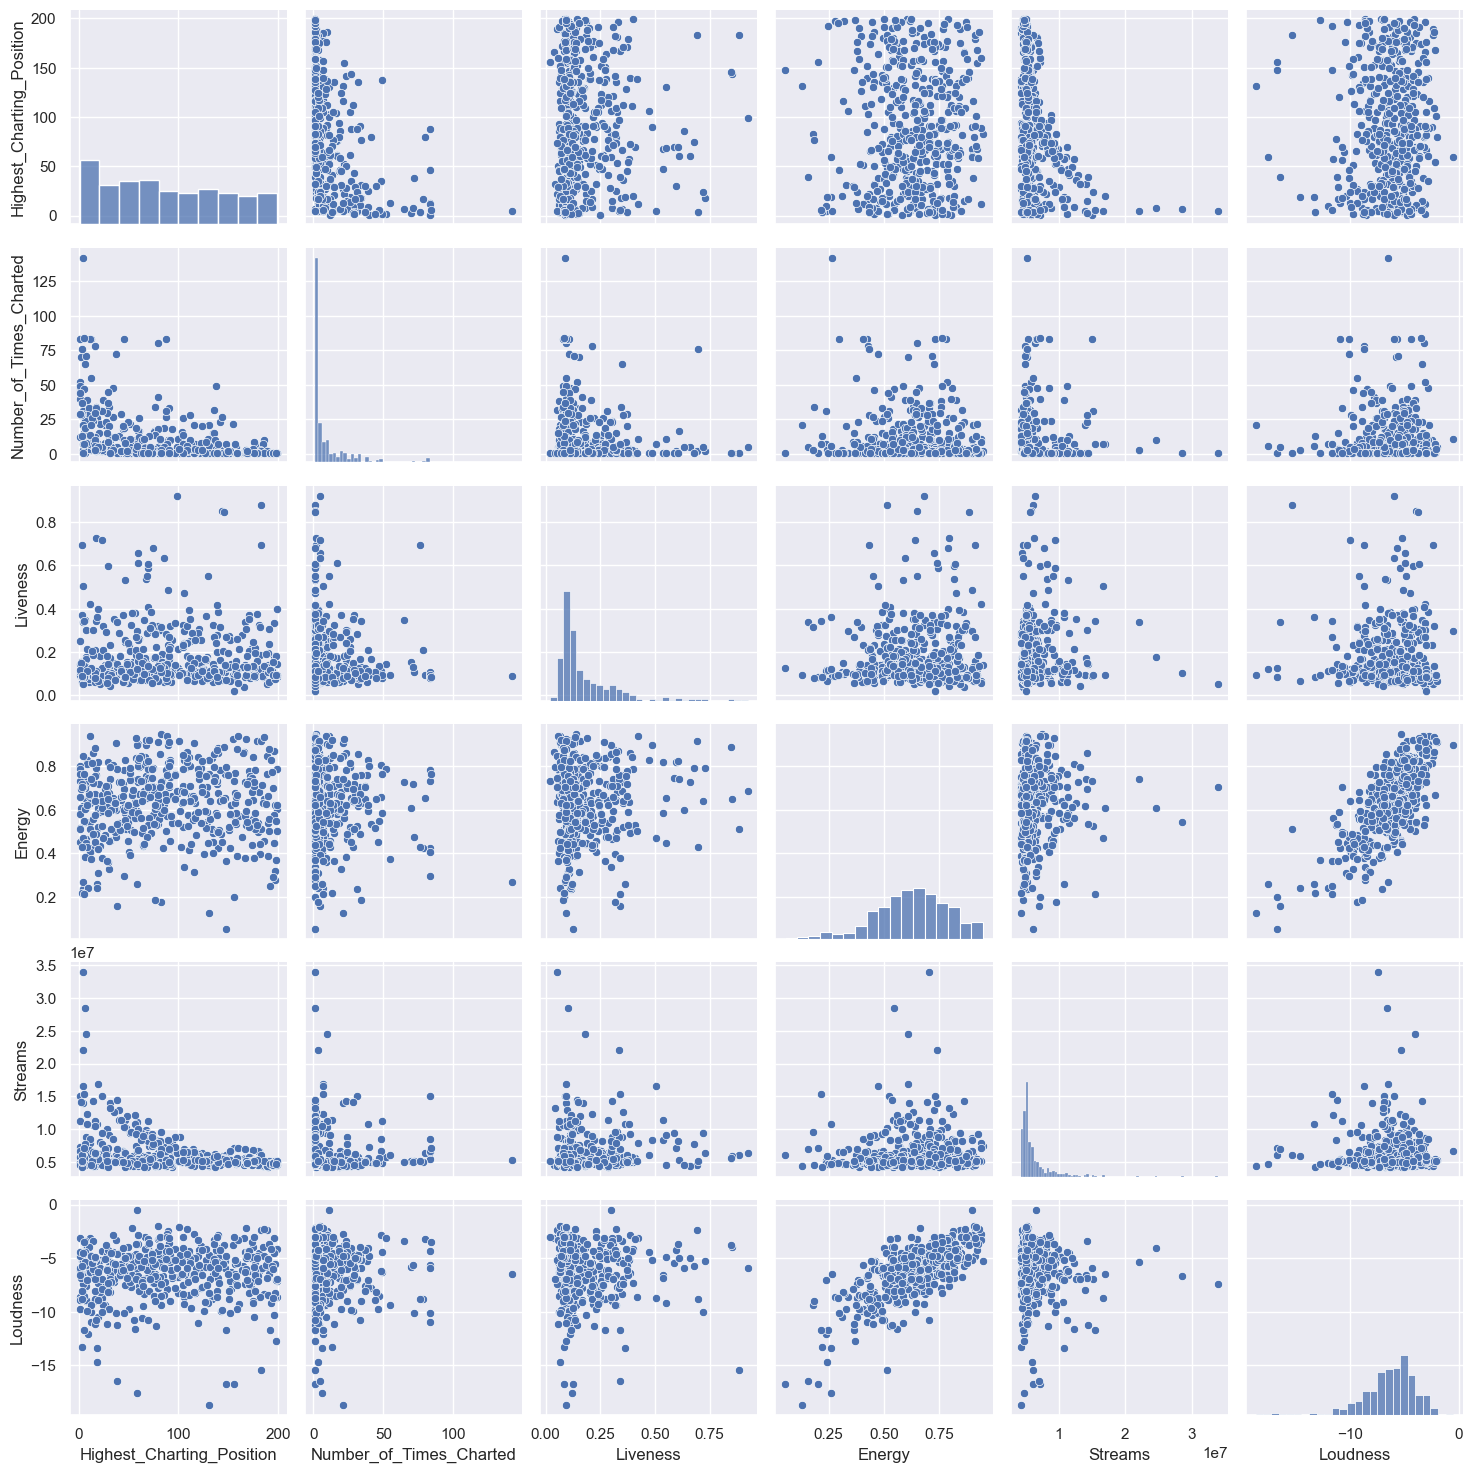

In [357]:
sns.pairplot(df[["Highest_Charting_Position", "Number_of_Times_Charted", "Liveness", "Energy", "Streams", "Loudness"]])
plt.show()

In [358]:
df[["Highest_Charting_Position", "Number_of_Times_Charted", "Liveness", "Energy", "Streams", "Loudness"]].corr()

,Highest_Charting_Position,Number_of_Times_Charted,Liveness,Energy,Streams,Loudness
Highest_Charting_Position,1.000000,-0.443181,0.024175,0.047682,-0.323380,0.038156
Number_of_Times_Charted,-0.443181,1.000000,-0.100727,-0.094035,-0.038634,-0.001531
Liveness,0.024175,-0.100727,1.000000,0.087015,0.071647,0.035085
Energy,0.047682,-0.094035,0.087015,1.000000,0.031812,0.739821
Streams,-0.323380,-0.038634,0.071647,0.031812,1.000000,-0.030341
Loudness,0.038156,-0.001531,0.035085,0.739821,-0.030341,1.000000


If we were to delete one of these numerical explanatory variables (because of the multicollinearity condition
being violated), which one would you choose? Let's try deleting both variables (one at a time) and see which resulting model has a higher R^2(ie. more explanatory power). 

In [359]:
results1 =  smf.ols(formula = 'Popularity ~ Highest_Charting_Position + Number_of_Times_Charted + Liveness + Energy + Streams', data = df).fit()

print('R^2forthemodelwithoutLoudness:',results1.rsquared)

R^2forthemodelwithoutLoudness: 0.2179335899600573


In [360]:
results2 =  smf.ols(formula = 'Popularity ~ Highest_Charting_Position + Number_of_Times_Charted + Liveness + Streams + Loudness', data = df).fit()

print('R^2forthemodelwithoutLoudness:',results2.rsquared)

R^2forthemodelwithoutLoudness: 0.23776349149435272


As the R squared value is higher when we remove Energy, we should remove Energy from the model

#### Re-fit the model and re-check the conditions

Condition 1: Linearity Condition
- Because the distribution of points in the plot below are roughly evenly distributed above and below the line
as we move from left to right, we can say the linearity condition is met

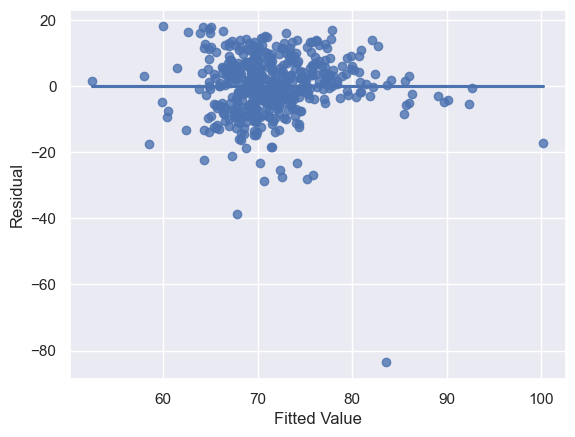

In [361]:
sns.regplot(x=results2.fittedvalues, y=results2.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

Condition 2: Constant Variability of Residuals Condition
- Because the y‑axis spread of points in the plot below doesn't really change as we move from left to right, we can say that this condition is met.

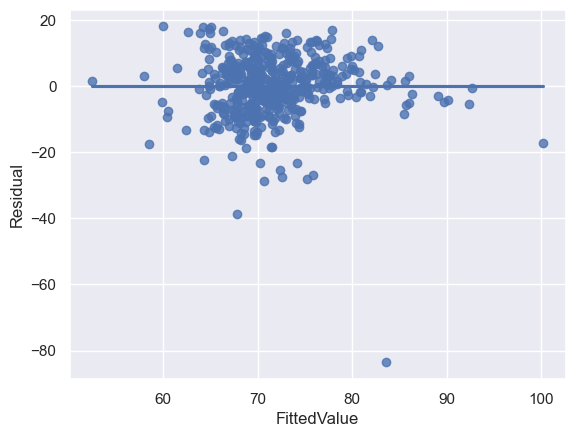

In [362]:
sns.regplot(x=results2.fittedvalues, y=results2.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('FittedValue')
plt.show()

Condition 3: Normality of Residuals (with Mean of 0) Condition:
- Because the histogram of residuals is moderately skewed to the left, the assumption that the residuals are normally distributed is slightly not met. (However, it does look like the mean is about 0).

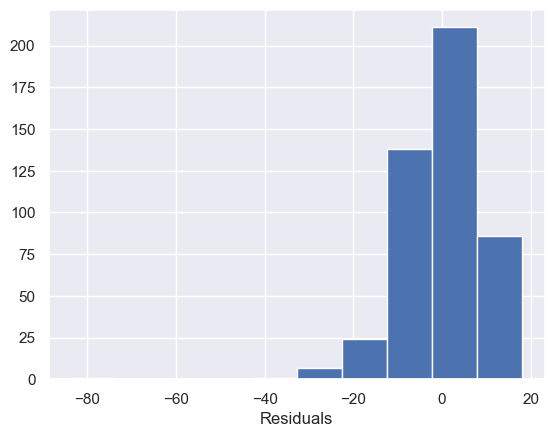

In [363]:
plt.hist(results2.resid)
plt.xlabel('Residuals')
plt.show()

Condition 4 Independence of Residuals Condition:
- The data is randomly sampled
- The sample size n < 10% of all top songs on Spotify

Condition 5: No Multicollinearity Condition
- As we removed a predictor variable, this

#### Make at least one prediction with your model.

In [364]:
new_data = pd.DataFrame({
    'Highest_Charting_Position': [12],
    'Number_of_Times_Charted': [8],
    'Liveness': [0.80],
    'Loudness': [-7.00],
    'Streams': [8832945]
})

# make prediction using exog argument
prediction = results2.predict(exog=new_data)

# print prediction
print(prediction)

0    68.45286
dtype: float64


#### Variability Explanation based on R^2 value

The R-squared value of this model is 0.238, which means that approximately 24% of the variability in the response variable (Popularity) is explained by the explanatory variables included in the model. 

(Note: This is neither extremely high nor extremely low. Typically, an R-squared value between 0.2 and 0.4 is considered moderate, while values above 0.7 are considered high)

#### Which slopes in your model do we have sufficient evidence to suggest are non-zero in the population model? Explain your answer

In [365]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     28.82
Date:                Wed, 03 May 2023   Prob (F-statistic):           1.82e-25
Time:                        23:37:24   Log-Likelihood:                -1714.4
No. Observations:                 468   AIC:                             3441.
Df Residuals:                     462   BIC:                             3466.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

The null hypothesis and alternative hypothesis:
- H0 : β1 = β2 = β3 = β4 = 0
- HA : βi ≠ 0 for (i = 1, 2, 3, 4)

According to the OLS regression results, we can see that the coefficients for "Highest_Charting_Position," "Number_of_Times_Charted," "Liveness," "Streams," and "Loudness" all have p-values less than 0.05, suggesting that there is sufficient evidence to suggest that the slopes for these variables are non-zero in the population. This means that they have a statistically significant relationship with the response variable (Song_Popularity).

Additionally, we can see that the confidence intervals for the regression coefficients do not contain zero for all of these variables, which further supports the conclusion that their slopes are significantly different from zero.

#### Discussion on how the your linear regression analysis helps answer my research question

Our linear regression analysis can help answer our research question by allowing us to determine which of the five explanatory variables "Highest_Charting_Position," "Number_of_Times_Charted," "Liveness," "Streams," and "Loudness") have a significant linear relationship with the response variable Popularity score. By identifying which variables are most strongly associated with Popularity, we can gain insight into the factors that contrinute to a player's point production and potentially use this information to make decisions about growth strategy for artist songs or record labels.

Ultimately, the OLS regression model output shows that there is a linear relationship between the audio features and the number of streams a song gets on Spotify. The explanatory variables, including Highest_Charting_Position, Number_of_Times_Charted, Liveness, Streams, and Loudness, are all statistically significant predictors of the response variable, Popularity. The R-squared value indicates that approximately 23.8% of the variability in the response variable can be explained by the model.

## 5. Logistic Regression

In [366]:
df.head(5)

,Highest_Charting_Position,Number_of_Times_Charted,Week_of_Highest_Charting,Week_of_Highest_Charting_year,Week_of_Highest_Charting_month,Week_of_Highest_Charting_day,Song_Name,Streams,Artist,Artist_Followers,...,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_ms,Valence,Chord,Genre_1
0,8,24,4/2/21,2021,4,2,Heartbreak Anniversary,8832945,Giveon,1398563,...,0.465,-8.964,0.079,0.524,0.303,89.087,198371,0.543,C,pop
1,92,2,5/15/20,2020,5,15,X (with KAROL G),5018592,Jonas Brothers,5436999,...,0.827,-5.090,0.062,0.049,0.321,117.977,185277,0.750,E,boy band
2,181,1,12/18/20,2020,12,18,Christmas Tree Farm,6657404,Taylor Swift,42227614,...,0.680,-4.505,0.033,0.060,0.324,134.002,228027,0.437,G,pop
3,12,29,11/27/20,2020,11,27,TE MUDASTE,5242347,Bad Bunny,36142273,...,0.637,-4.835,0.059,0.234,0.118,92.025,130014,0.471,A#/Bb,latin
4,32,10,1/3/20,2020,1,3,Futsal Shuffle 2020,5386512,Lil Uzi Vert,11821805,...,0.457,-8.191,0.156,0.033,0.231,136.970,198913,0.296,G,melodic rap


In [367]:
df_clean = df[['Popularity', 'Highest_Charting_Position', 'Number_of_Times_Charted', 'Liveness', 'Streams', 'Loudness']]
df_clean

,Popularity,Highest_Charting_Position,Number_of_Times_Charted,Liveness,Streams,Loudness
0,87,8,24,0.303,8832945,-8.964
1,70,92,2,0.321,5018592,-5.090
2,52,181,1,0.324,6657404,-4.505
3,82,12,29,0.118,5242347,-4.835
4,67,32,10,0.231,5386512,-8.191
...,...,...,...,...,...,...
490,85,4,76,0.696,5238547,-8.765
491,72,30,9,0.144,4252898,-7.340
492,69,29,15,0.055,5234645,-11.144
494,55,6,7,0.341,15424001,-11.714


In [368]:
# calculate the median of our variable Popularity
set_value = df_clean['Popularity'].median()
print(set_value)
# create a new column named good
df_clean['popular_song'] = 1 * (df['Popularity'] >= set_value)
df_clean

72.0


,Popularity,Highest_Charting_Position,Number_of_Times_Charted,Liveness,Streams,Loudness,popular_song
0,87,8,24,0.303,8832945,-8.964,1
1,70,92,2,0.321,5018592,-5.090,0
2,52,181,1,0.324,6657404,-4.505,0
3,82,12,29,0.118,5242347,-4.835,1
4,67,32,10,0.231,5386512,-8.191,0
...,...,...,...,...,...,...,...
490,85,4,76,0.696,5238547,-8.765,1
491,72,30,9,0.144,4252898,-7.340,1
492,69,29,15,0.055,5234645,-11.144,0
494,55,6,7,0.341,15424001,-11.714,0


Logistic Research Question:
- Is there a linear relationship between the log odds of the popularity of a song and the highest charting position, the number of times song was charted, liveness, streams and loudness of the song in the sample? 

In other words, how can we determine whether a relatively popular song given the highest charting position, the number of times song was charted, liveness, streams and loudness of the song in the sample?

In [369]:
# find traing data and testing data
df_train, df_test = train_test_split(df_clean, test_size=0.20, random_state=42)
df_train.head(6)

,Popularity,Highest_Charting_Position,Number_of_Times_Charted,Liveness,Streams,Loudness,popular_song
322,69,42,2,0.182,5249342,-6.558,0
22,0,13,83,0.100,5436286,-10.965,0
444,70,74,1,0.120,9325928,-4.672,0
47,49,196,1,0.183,4866777,-10.304,0
180,77,140,4,0.387,5092250,-2.827,1
391,70,43,2,0.123,5375449,-5.506,0


In [370]:
df_test.head(6)

,Popularity,Highest_Charting_Position,Number_of_Times_Charted,Liveness,Streams,Loudness,popular_song
57,80,138,49,0.081,4900492,-6.319,1
65,29,180,1,0.102,6680928,-6.676,0
33,70,139,8,0.277,4401019,-4.454,0
314,60,167,1,0.339,6985392,-7.381,0
75,83,5,142,0.089,5294368,-6.502,1
240,62,73,1,0.385,9260007,-6.356,0


#### Backward Elimination

##### Iteration 1: explanatory variables: Highest_Charting_Position + Number_of_Times_Charted + Liveness + Streams + Loudness

In [371]:
# Calculate the BIC of our current model
current_mod=smf.logit('popular_song ~ Highest_Charting_Position + Number_of_Times_Charted + Liveness + Streams + Loudness', data=df_clean).fit()
print('ITERATION 1: BIC of the Current Model',current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.510116
         Iterations 8
ITERATION 1: BIC of the Current Model 514.359492011075


In [372]:
test_mod=smf.logit('popular_song ~  Number_of_Times_Charted + Liveness + Streams + Loudness', data=df_clean).fit()
print('BIC of Test Model that Deletes Highest_Charting_Position from the Current Model', test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.512604
         Iterations 8
BIC of Test Model that Deletes Highest_Charting_Position from the Current Model 510.53931182231264


In [373]:
test_mod=smf.logit('popular_song ~  Highest_Charting_Position + Liveness + Streams + Loudness', data=df_clean).fit()
print('BIC of Test Model that Deletes Number_of_Times_Charted from the Current Model', test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.628169
         Iterations 5
BIC of Test Model that Deletes Number_of_Times_Charted from the Current Model 618.7085556396803


In [374]:
test_mod=smf.logit('popular_song ~  Highest_Charting_Position + Number_of_Times_Charted + Streams + Loudness', data=df_clean).fit()
print('BIC of Test Model that Deletes Liveness from the Current Model', test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.520813
         Iterations 8
BIC of Test Model that Deletes Liveness from the Current Model 518.2229998311066


In [375]:
test_mod=smf.logit('popular_song ~  Highest_Charting_Position + Number_of_Times_Charted + Liveness + Loudness', data=df_clean).fit()
print('BIC of Test Model that Deletes Streams from the Current Model', test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.514144
         Iterations 8
BIC of Test Model that Deletes Streams from the Current Model 511.98069897592745


In [376]:
test_mod=smf.logit('popular_song ~  Highest_Charting_Position + Number_of_Times_Charted + Liveness + Streams', data=df_clean).fit()
print('BIC of Test Model that Deletes Streams from the Current Model', test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.526217
         Iterations 8
BIC of Test Model that Deletes Streams from the Current Model 523.281762673506


The test model that had the lowest BIC score was the one that deleted the Highest_Charting_Position variable from the current model. So, we set the new current model to be the test model that does not include Highest_Charting_Position.

##### Iteration 2: explanatory variables = Number_of_Times_Charted + Liveness + Streams + Loudness

In [377]:
current_mod=smf.logit('popular_song ~  Number_of_Times_Charted + Liveness + Streams + Loudness', data=df_clean).fit()
print('ITERATION 2: BIC of the Current Model',current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.512604
         Iterations 8
ITERATION 2: BIC of the Current Model 510.53931182231264


In [378]:
test_mod=smf.logit('popular_song ~  Number_of_Times_Charted + Liveness + Streams', data=df_clean).fit()
print('BIC of Test Model that Deletes Highest_Charting_Position from the Current Model', test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.529530
         Iterations 8
BIC of Test Model that Deletes Highest_Charting_Position from the Current Model 520.2339688377309


In [379]:
test_mod=smf.logit('popular_song ~  Highest_Charting_Position + Liveness + Streams', data=df_clean).fit()
print('BIC of Test Model that Deletes Number_of_Times_Charted from the Current Model', test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.645268
         Iterations 5
BIC of Test Model that Deletes Number_of_Times_Charted from the Current Model 628.5644055847162


In [380]:
test_mod=smf.logit('popular_song ~  Highest_Charting_Position + Number_of_Times_Charted + Streams', data=df_clean).fit()
print('BIC of Test Model that Deletes Liveness from the Current Model', test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.535564
         Iterations 8
BIC of Test Model that Deletes Liveness from the Current Model 525.8813706769583


In [381]:
test_mod=smf.logit('popular_song ~  Highest_Charting_Position + Number_of_Times_Charted + Loudness', data=df_clean).fit()
print('BIC of Test Model that Deletes Streams from the Current Model', test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.524116
         Iterations 8
BIC of Test Model that Deletes Streams from the Current Model 515.1663225088682


Because there were no test models that had a lower BIC score than the current mode, we STOP THE ALGORITHM and decide to use the current model with explanatory variables = Number_of_Times_Charted + Liveness + Streams + Loudness

#### Final Logistic Model

In [382]:
final_mod=smf.logit('popular_song ~  Number_of_Times_Charted + Liveness + Streams + Loudness', data=df_train).fit()
print(final_mod.summary())

Optimization terminated successfully.
         Current function value: 0.530359
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           popular_song   No. Observations:                  374
Model:                          Logit   Df Residuals:                      369
Method:                           MLE   Df Model:                            4
Date:                Wed, 03 May 2023   Pseudo R-squ.:                  0.2303
Time:                        23:38:36   Log-Likelihood:                -198.35
converged:                       True   LL-Null:                       -257.69
Covariance Type:            nonrobust   LLR p-value:                 1.027e-24
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.5117      0.471      1.087      0.277      -0.411   

#### Logistic Regression Equation
ln(p̂/(1-p̂))= 0.5117 + 0.1468*Number_of_Times_Charted + -2.5332*Liveness + 5.102e-08*Streams + 0.1828*Loudness

Our logistic regression analysis reveals that the predictor variables "Number_of_Times_Charted" and "Loudness" have statistically significant coefficients, as their p-values are less than the significance level of 0.05. The confidence intervals for both predictor variables do not contain zero, which provides further evidence of their significant impact on the response variable "popular_song". In contrast, the predictor variables "Intercept" and "Streams" have p-values greater than 0.05, indicating that their slopes are not statistically significant in the population model. Therefore, we can conclude that "Number_of_Times_Charted" and "Loudness" have a significant impact on the probability of a song being popular, while "Intercept" and "Streams" do not significantly contribute to the model.

#### ROC and AUC

In [383]:
# calculate the predicted probabilities
pred_probabilities = final_mod.predict(exog=dict(df_test)) 
df_test['predictive_prob']=pred_probabilities

In [384]:
# Calculate the AUC
fprs, tprs, thresholds = roc_curve(y_true=df_test['popular_song'], y_score=df_test['predictive_prob'])
auc = roc_auc_score(y_true=df_test['popular_song'], y_score=df_test['predictive_prob'])
auc

0.8695054945054945

In [385]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

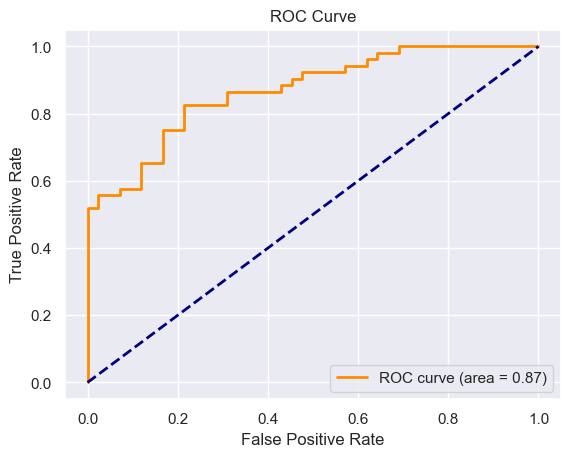

In [386]:
# Plot the ROC curve
plot_roc(fprs, tprs, auc)

In [387]:
def tpr_fpr_thresh(y, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold':[thresh], 'tpr':[tpr],'fpr':[fpr]})

In [388]:
for thresh in np.arange(0,1,0.01):
    print(tpr_fpr_thresh(df_test['popular_song'], df_test['predictive_prob'], thresh))

   threshold  tpr  fpr
0        0.0  1.0  1.0
   threshold  tpr  fpr
0       0.01  1.0  1.0
   threshold  tpr      fpr
0       0.02  1.0  0.97619
   threshold  tpr      fpr
0       0.03  1.0  0.97619
   threshold  tpr      fpr
0       0.04  1.0  0.97619
   threshold  tpr      fpr
0       0.05  1.0  0.97619
   threshold  tpr      fpr
0       0.06  1.0  0.97619
   threshold  tpr      fpr
0       0.07  1.0  0.97619
   threshold  tpr      fpr
0       0.08  1.0  0.97619
   threshold  tpr       fpr
0       0.09  1.0  0.952381
   threshold  tpr       fpr
0        0.1  1.0  0.928571
   threshold  tpr       fpr
0       0.11  1.0  0.928571
   threshold  tpr       fpr
0       0.12  1.0  0.928571
   threshold  tpr       fpr
0       0.13  1.0  0.928571
   threshold  tpr       fpr
0       0.14  1.0  0.928571
   threshold  tpr       fpr
0       0.15  1.0  0.928571
   threshold  tpr       fpr
0       0.16  1.0  0.928571
   threshold  tpr       fpr
0       0.17  1.0  0.928571
   threshold  tpr       fp

Our research goal is to determine whether a song is a popular song given the Number_of_Times_Charted, Loudness, Streams, and Liveness. Therefore, it is better to have more songs that are turly relatively popular. So, we would want to choose a relatively high true positive rate.

This threshold was chosen because it provides a relatively high TPR, meaning that more songs that is popular will be identified as such, while also having a low FPR. This minimizes the number of false positives, and by selecting a threshold that balances TPR and FPR in this way, we can ensure that the logistic model accurately identifies songs that are truly relatively popular with minimum risk of false positives.

> We will choose a threshold of 0.6 with tpr (true positive rate) of 0.55 and fpr (false positive rate) of 0.02381 because it gives us a relatively high true positive rate and the lowest false positive rate at its true positive rate level.

In [389]:
df_test['pred_good']=1*(pred_probabilities>=0.6)

We want to find the tn (true negative), fp (false positive), fn (false negative), and tp (true positive) of our data.

In [390]:
tn, fp, fn, tp = confusion_matrix(y_true=df_test['popular_song'], y_pred=df_test['pred_good']).ravel()
(tn, fp, fn, tp)

(41, 1, 23, 29)

From the code above, we can see that:

- tn (true negative): 41
- fn (false negative): 1
- fp (false positive): 23
- tp (true positive): 29



From the tn (true negative), fp (false positive), fn (false negative), and tp (true positive) we calculated above, we can find out the fpr (false positive rate) and the tpr (true positive rate) of our data set.

In [391]:
fpr=fp/(fp+tp)
tpr=tp/(tp+fp)
print('Our false positive rate is:', fpr)
print('Our true positive rate is:', tpr)

Our false positive rate is: 0.03333333333333333
Our true positive rate is: 0.9666666666666667


#### How does my logistic regression analysis answer my research question?

Our logistic regression analysis ultimately helps answer my research question by identifying how many explanatory variables (in this case: Number_of_Times_Charted, Loudness, Streams, and Liveness) affect whether a song will be popular or not.

From the logistic regression analysis performed on the data, we can conclude that there is a significant linear relationship between the log odds of the popularity of a song and the number of times the song was charted and the loudness of the song. Specifically, for every one-unit increase in the number of times the song was charted, the log odds of the song being popular increase by 14.68%. Similarly, for every one-unit increase in the loudness of the song, the log odds of the song being popular increase by 18.28%.

However, the predictor variables "Intercept" and "Streams" were found to be not significant in the model. This means that the initial level of popularity of a song and the number of streams it received did not significantly contribute to the probability of the song being popular.

Our false positive rate was 3.33%, indicating that the probability of falsely classifying a non-popular song as popular is low. On the other hand, our true positive rate was 96.67%, indicating that the probability of correctly classifying a popular song as popular is high. This suggests that the logistic regression model we used is a reliable tool for predicting the popularity of a song based on the given variables.

## Any other type of analysis/question you want to explore with this dataset.

<u>Why?</u>: Sometimes undergraduate students will put the research projects that they did for their classes on their resumes when applying for graduate schools, internships, and jobs. If you're interested in showcasing cool analyses to write on your resume, this section could help with that. **(This section is not worth any points though).**

## 6. Conclusion

##### Summarization

From our descriptive statistic analysis, based on the scatter plot and summary statistics, it appears that songs that are more danceable and energetic tend to be more popular on the Spotify charts. The scatter plot shows that the majority of songs that are popular have relatively high values for both danceability and energy. Consequently, the points on the scatter plot are more concentrated in the upper right quadrant, proving that there are more songs with high danceability and energy among the most popular songs on Spotify. Moreover, the summary statistics further support this finding as the mean danceability and energy values for the songs in the data are both above 0.5, which suggests that the songs give off positive vibe and energy. Taken together, the visualizations of data suggest that there is an existing preference for upbeat and danceable music among Spotify listeners, and this insight can be beneficial for musicians or record labels aiming to create popular music

In our inferential analysis, with a p-value of 0.7242142106106226, which is greater than the commonly used significance level of 0.05, we fail to reject the null hypothesis. Therefore, we have sufficient evidence to conclude that there is no statistically significant difference in the mean popularity score between Dance Pop Genre and Latin Genre. However, it's important to note that this conclusion is limited to the data and time period analyzed and may not necessarily hold true for other populations or time periods.

Also, our linear regression analysis allowed us to answer our research question by identifying which of the five explanatory variables ("Highest_Charting_Position," "Number_of_Times_Charted," "Liveness," "Streams," and "Loudness") have a significant linear relationship with the response variable Popularity score. By determining which variables are most strongly associated with Popularity, we can gain insights into the factors that contribute to an artist's song's success on Spotify and use this information to make informed decisions about growth strategy for songs or record labels. The OLS regression model output ultimately shows that all the explanatory variables, including Highest_Charting_Position, Number_of_Times_Charted, Liveness, Streams, and Loudness, are statistically significant predictors of the response variable Popularity. This indicates that there is a linear relationship between the audio features and the number of streams a song gets on Spotify. The R-squared value of approximately 23.8% indicates that the model can explain around 23.8% of the variability in the response variable, giving us a better understanding of the factors that contribute to a song's popularity on the platform.

Finally, our logistic regression analysis showed that two predictor variables, "Number_of_Times_Charted" and "Loudness," have statistically significant coefficients, with p-values less than the significance level of 0.05. Furthermore, the confidence intervals for these variables do not contain zero, providing evidence of their significant impact on the response variable "popular_song." Conversely, the predictor variables "Intercept" and "Streams" have p-values greater than 0.05, indicating that their slopes are not statistically significant in the population model. Therefore, we can conclude that "Number_of_Times_Charted" and "Loudness" significantly impact the probability of a song being popular, while "Intercept" and "Streams" do not significantly contribute to the model. In answering our research question, the logistic regression analysis identifies how many explanatory variables, including "Number_of_Times_Charted," "Loudness," "Streams," and "Liveness," affect the likelihood of a song being popular. The analysis indicates a significant linear relationship between the log odds of a song's popularity and the number of times it was charted and the loudness of the song. Specifically, each unit increase in the number of times a song was charted resulted in a 14.68% increase in the log odds of the song being popular, and each unit increase in the loudness of the song resulted in an 18.28% increase in the log odds of the song being popular. However, the predictor variables "Intercept" and "Streams" were found to be insignificant in the model, indicating that the initial level of popularity of a song and the number of streams it received did not significantly contribute to the probability of the song being popular.

>In conclusion, our analysis of Spotify music data provides valuable insights into the factors that contribute to the popularity of songs on the platform. Based on our descriptive analysis, we found that songs that are more danceable and energetic tend to be more popular, as evidenced by their higher mean danceability and energy values. Our linear regression analysis showed that the explanatory variables, including highest charting position, number of times charted, liveness, streams, and loudness, all have a statistically significant linear relationship with the response variable, popularity score. Additionally, our logistic regression analysis revealed that the number of times a song was charted and the loudness of the song have a significant impact on the probability of a song being popular. The initial level of popularity of a song and the number of streams it received, on the other hand, did not significantly contribute to the probability of the song being popular. These insights can be useful for musicians or record labels aiming to create popular music and for predicting the popularity of a song based on its features.

##### Future Work

Steps for next time:

For Descriptive Analysis:
- Incorporating more data from different periods as the conclusion I drew from the current dataset I used will be limited to the data and time period analyzed and may not necessarily hold true for other populations or time periods.
- Conduct a more in-depth analysis of the data using alternative visualization tools, such as violin plots or boxplots with hue, to identify other potential patterns and relationships between variables.
- Exploring different music platforms other than Spotify would also be a great step to validate our conclusion; for example, Youtube Music or Apple Music could be explored.

While the linear regression analysis ofund that "Highest_Charting_Position," "Number_of_Times_Charted," "Liveness," "Streams," and "Loudness" were significant predictors of song popularity score determination, I believe that further research could be provided to explore different potential predictors, such as song budget spent for marketing, social media sentiment, artist follwers on social media, etc. We could examine how different combinations of such predictors can affect a song's overall popularity.

To validate the logistic regression model, I believe that further research could be conducted to collect additional evidence, allowing us to evaluate our model's performance based on new data. Also, there could be different statistical methods to explore this idea, which includes decision tree models or supoort vector machines (or even using forward selection instead of backward selection), to better predict a song's relative popularity score. 